In [1]:
import pandas as pd

path = "../data/raw/spy_2020_2022.csv"

df = pd.read_csv(path)

df.shape, df.columns

/var/folders/bb/r1sgz0zs51d9rst12r3cbzl80000gn/T/ipykernel_60956/1420816139.py:5: DtypeWarning: Columns (8,9,10,11,12,13,15,17,18,20,21,23,24,25,26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


((3589079, 33),
 Index(['[QUOTE_UNIXTIME]', ' [QUOTE_READTIME]', ' [QUOTE_DATE]',
        ' [QUOTE_TIME_HOURS]', ' [UNDERLYING_LAST]', ' [EXPIRE_DATE]',
        ' [EXPIRE_UNIX]', ' [DTE]', ' [C_DELTA]', ' [C_GAMMA]', ' [C_VEGA]',
        ' [C_THETA]', ' [C_RHO]', ' [C_IV]', ' [C_VOLUME]', ' [C_LAST]',
        ' [C_SIZE]', ' [C_BID]', ' [C_ASK]', ' [STRIKE]', ' [P_BID]',
        ' [P_ASK]', ' [P_SIZE]', ' [P_LAST]', ' [P_DELTA]', ' [P_GAMMA]',
        ' [P_VEGA]', ' [P_THETA]', ' [P_RHO]', ' [P_IV]', ' [P_VOLUME]',
        ' [STRIKE_DISTANCE]', ' [STRIKE_DISTANCE_PCT]'],
       dtype='object'))

In [3]:
import pandas as pd
import numpy as np

path = "../data/raw/spy_2020_2022.csv"

# low_memory=False reduces the mixed-type warning noise
df = pd.read_csv(path, low_memory=False)

# Strip the square brackets from column names: "[QUOTE_DATE]" -> "QUOTE_DATE"
df.columns = df.columns.str.strip().str.replace(r"^\[|\]$", "", regex=True)

df.columns

Index(['QUOTE_UNIXTIME', 'QUOTE_READTIME', 'QUOTE_DATE', 'QUOTE_TIME_HOURS',
       'UNDERLYING_LAST', 'EXPIRE_DATE', 'EXPIRE_UNIX', 'DTE', 'C_DELTA',
       'C_GAMMA', 'C_VEGA', 'C_THETA', 'C_RHO', 'C_IV', 'C_VOLUME', 'C_LAST',
       'C_SIZE', 'C_BID', 'C_ASK', 'STRIKE', 'P_BID', 'P_ASK', 'P_SIZE',
       'P_LAST', 'P_DELTA', 'P_GAMMA', 'P_VEGA', 'P_THETA', 'P_RHO', 'P_IV',
       'P_VOLUME', 'STRIKE_DISTANCE', 'STRIKE_DISTANCE_PCT'],
      dtype='object')

In [4]:
sample_date = "2020-01-02"
df_day = df[df["QUOTE_DATE"] == sample_date].copy()
df_day.shape

(0, 33)

In [5]:
calls = df_day[(df_day["C_BID"] > 0) & (df_day["C_ASK"] > 0)].copy()

calls["price"] = 0.5 * (calls["C_BID"] + calls["C_ASK"])
calls["S"] = calls["UNDERLYING_LAST"]
calls["K"] = calls["STRIKE"]
calls["T"] = calls["DTE"] / 365.0
calls["r"] = 0.01   # MVP flat rate
calls["q"] = 0.0
calls["option_type"] = "call"

calls.shape, calls[["QUOTE_DATE", "EXPIRE_DATE", "S", "K", "T", "price"]].head()

((0, 40),
 Empty DataFrame
 Columns: [QUOTE_DATE, EXPIRE_DATE, S, K, T, price]
 Index: [])

In [7]:
sample_date = "2020-03-20"
df_day = df[df["QUOTE_DATE"] == sample_date].copy()
df_day.shape

(0, 33)

In [10]:
df["QUOTE_DATE"] = df["QUOTE_DATE"].astype(str).str.strip()
df["EXPIRE_DATE"] = df["EXPIRE_DATE"].astype(str).str.strip()

sample_date = df["QUOTE_DATE"].value_counts().idxmax()
sample_date

df_day = df[df["QUOTE_DATE"] == sample_date].copy()
df_day.shape


(5879, 33)

In [11]:
calls = df_day[(df_day["C_BID"] > 0) & (df_day["C_ASK"] > 0)].copy()

calls["price"] = 0.5 * (calls["C_BID"] + calls["C_ASK"])
calls["S"] = calls["UNDERLYING_LAST"]
calls["K"] = calls["STRIKE"]
calls["T"] = calls["DTE"] / 365.0
calls["r"] = 0.01
calls["q"] = 0.0
calls["option_type"] = "call"

calls.shape, calls[["QUOTE_DATE", "EXPIRE_DATE", "S", "K", "T", "price"]].head()

TypeError: '>' not supported between instances of 'str' and 'int'

In [14]:
num_cols = ["UNDERLYING_LAST", "STRIKE", "DTE", "C_BID", "C_ASK", "C_LAST"]

for c in num_cols:
    df_day[c] = pd.to_numeric(df_day[c], errors="coerce")

calls.shape

(0, 40)

In [15]:
calls = df_day[df_day["C_LAST"] > 0].copy()

calls["price"] = calls["C_LAST"]
calls["S"] = calls["UNDERLYING_LAST"]
calls["K"] = calls["STRIKE"]
calls["T"] = calls["DTE"] / 365.0
calls["r"] = 0.01
calls["q"] = 0.0
calls["option_type"] = "call"

calls.shape, calls[["QUOTE_DATE", "EXPIRE_DATE", "S", "K", "T", "price"]].head()

((4834, 40),
          QUOTE_DATE EXPIRE_DATE       S     K    T   price
 2025717  2020-03-20  2020-03-20  228.95  50.0  0.0  264.02
 2025718  2020-03-20  2020-03-20  228.95  55.0  0.0  259.04
 2025719  2020-03-20  2020-03-20  228.95  60.0  0.0  252.38
 2025720  2020-03-20  2020-03-20  228.95  65.0  0.0  260.68
 2025721  2020-03-20  2020-03-20  228.95  70.0  0.0  262.74)

In [16]:
calls = calls[calls["T"] > 0].copy()

calls.shape

(4613, 40)

In [17]:
calls["EXPIRE_DATE"].value_counts().head()

EXPIRE_DATE
2020-04-17    223
2020-06-19    202
2020-05-15    196
2020-12-18    193
2021-01-15    191
Name: count, dtype: int64

In [18]:
calls_exp = calls[calls["EXPIRE_DATE"] == expiry].copy()
calls_exp.shape

NameError: name 'expiry' is not defined

In [19]:
expiry = calls["EXPIRE_DATE"].value_counts().idxmax()
expiry

'2020-04-17'

In [20]:
calls_exp = calls[calls["EXPIRE_DATE"] == expiry].copy()
calls_exp.shape

(223, 40)

In [21]:
calls_exp.shape

(223, 40)

In [22]:
from mvp.iv import implied_vol_call

# Compute implied volatility
calls_exp["iv"] = calls_exp.apply(
    lambda row: implied_vol_call(
        price=row["price"],
        S=row["S"],
        K=row["K"],
        r=row["r"],
        q=row["q"],
        T=row["T"],
    ),
    axis=1
)

calls_exp[["K", "price", "T", "iv"]].head()

ImportError: cannot import name 'implied_vol_call' from 'mvp.iv' (/Users/rezarahimi/PycharmProjects/options-vol-surface-mvp/src/mvp/iv.py)

In [23]:
from mvp.iv import implied_vol_call

calls_exp["iv"] = calls_exp.apply(
    lambda row: implied_vol_call(
        price=row["price"],
        S=row["S"],
        K=row["K"],
        r=row["r"],
        q=row["q"],
        T=row["T"],
    ),
    axis=1
)

calls_exp[["K", "price", "T", "iv"]].head()

ImportError: cannot import name 'implied_vol_call' from 'mvp.iv' (/Users/rezarahimi/PycharmProjects/options-vol-surface-mvp/src/mvp/iv.py)

In [1]:
import pandas as pd
import numpy as np

path = "../data/raw/spy_2020_2022.csv"
df = pd.read_csv(path, low_memory=False)

# remove brackets from column names
df.columns = df.columns.str.strip().str.replace(r"^\[|\]$", "", regex=True)

# strip whitespace in date strings (important)
df["QUOTE_DATE"] = df["QUOTE_DATE"].astype(str).str.strip()
df["EXPIRE_DATE"] = df["EXPIRE_DATE"].astype(str).str.strip()

df.shape

(3589079, 33)

In [3]:
sample_date = df["QUOTE_DATE"].value_counts().idxmax()
sample_date

df_day = df[df["QUOTE_DATE"] == sample_date].copy()
df_day.shape

(5879, 33)

In [5]:
num_cols = [
    "UNDERLYING_LAST",
    "STRIKE",
    "DTE",
    "C_BID",
    "C_ASK",
    "C_LAST",
    "P_BID",
    "P_ASK",
    "P_LAST",
]

for c in num_cols:
    df_day[c] = pd.to_numeric(df_day[c], errors="coerce")

df_day[num_cols].dtypes


UNDERLYING_LAST    float64
STRIKE             float64
DTE                float64
C_BID              float64
C_ASK              float64
C_LAST             float64
P_BID              float64
P_ASK              float64
P_LAST             float64
dtype: object

In [6]:
calls = df_day[df_day["C_LAST"] > 0].copy()

calls["price"] = calls["C_LAST"]
calls["S"] = calls["UNDERLYING_LAST"]
calls["K"] = calls["STRIKE"]
calls["T"] = calls["DTE"] / 365.0
calls["r"] = 0.01
calls["q"] = 0.0
calls["option_type"] = "call"

calls = calls[calls["T"] > 0].copy()

calls.shape

(4613, 40)

In [7]:
expiry = calls["EXPIRE_DATE"].value_counts().idxmax()
expiry

'2020-04-17'

In [8]:
calls_exp = calls[calls["EXPIRE_DATE"] == expiry].copy()
calls_exp.shape

(223, 40)

In [9]:
from mvp.iv import implied_vol_call

In [10]:
calls_exp["iv"] = calls_exp.apply(
    lambda row: implied_vol_call(
        price=row["price"],
        S=row["S"],
        K=row["K"],
        r=row["r"],
        q=row["q"],
        T=row["T"],
    ),
    axis=1
)

calls_exp[["K", "price", "T", "iv"]].head()

,K,price,T,iv
2028013,125.0,116.12,0.076712,2.517237
2028014,130.0,111.09,0.076712,2.392148
2028015,135.0,106.08,0.076712,2.273522
2028018,150.0,89.52,0.076712,1.834629
2028028,160.0,80.00,0.076712,1.670720


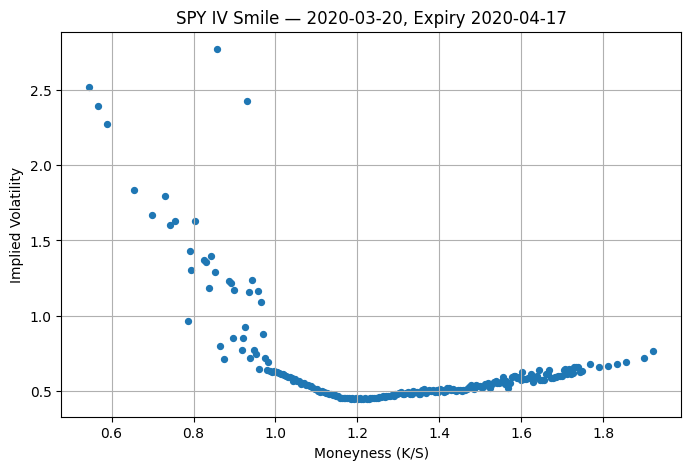

In [11]:
import matplotlib.pyplot as plt

calls_exp = calls_exp[(calls_exp["iv"] > 0.01) & (calls_exp["iv"] < 3.0)].copy()

plt.figure(figsize=(8,5))
plt.scatter(calls_exp["K"] / calls_exp["S"], calls_exp["iv"], s=18)
plt.xlabel("Moneyness (K/S)")
plt.ylabel("Implied Volatility")
plt.title(f"SPY IV Smile — {sample_date}, Expiry {expiry}")
plt.grid(True)
plt.show()

In [12]:
import numpy as np
import pandas as pd

from mvp.iv import implied_vol_call

# Start from your calls (already has S,K,T,price,r,q, EXPIRE_DATE, QUOTE_DATE)
# We'll take the top N expiries (most liquid) for that quote date
N_EXPIRIES = 8

top_expiries = calls["EXPIRE_DATE"].value_counts().head(N_EXPIRIES).index.tolist()
top_expiries

['2020-04-17',
 '2020-06-19',
 '2020-05-15',
 '2020-12-18',
 '2021-01-15',
 '2020-10-16',
 '2020-09-18',
 '2020-03-27']

In [13]:
surf = calls[calls["EXPIRE_DATE"].isin(top_expiries)].copy()

# Compute IV (this can take a minute depending on how many rows you include)
surf["iv"] = surf.apply(
    lambda row: implied_vol_call(
        price=row["price"],
        S=row["S"],
        K=row["K"],
        r=row["r"],
        q=row["q"],
        T=row["T"],
    ),
    axis=1
)

# Clean bad points
surf = surf[(surf["iv"] > 0.01) & (surf["iv"] < 3.0)].copy()

# Create surface coordinates
surf["moneyness"] = surf["K"] / surf["S"]
surf["tau"] = surf["T"]  # maturity in years

surf[["QUOTE_DATE","EXPIRE_DATE","moneyness","tau","iv"]].head(), surf.shape

(         QUOTE_DATE EXPIRE_DATE  moneyness       tau        iv
 2026472  2020-03-20  2020-03-27   0.742520  0.019178  2.613301
 2026474  2020-03-20  2020-03-27   0.786198  0.019178  2.563075
 2026475  2020-03-20  2020-03-27   0.808037  0.019178  2.766033
 2026477  2020-03-20  2020-03-27   0.851714  0.019178  1.004379
 2026478  2020-03-20  2020-03-27   0.873553  0.019178  1.100721,
 (1531, 43))

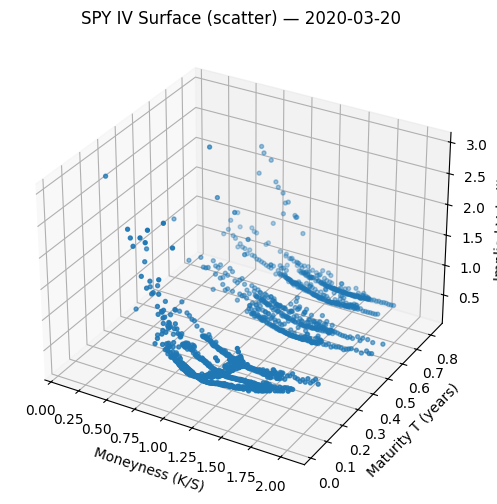

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(surf["moneyness"], surf["tau"], surf["iv"], s=8)

ax.set_xlabel("Moneyness (K/S)")
ax.set_ylabel("Maturity T (years)")
ax.set_zlabel("Implied Volatility")

ax.set_title(f"SPY IV Surface (scatter) — {sample_date}")
plt.show()

In [16]:
import numpy as np
import pandas as pd

# Keep a reasonable domain so the surface isn't dominated by crazy far OTM points
surf2 = surf[(surf["moneyness"] >= 0.6) & (surf["moneyness"] <= 1.6)].copy()
surf2 = surf2[(surf2["tau"] >= 7/365) & (surf2["tau"] <= 2.5)].copy()  # 1w to 2.5y

# Create grid axes
m_grid = np.linspace(surf2["moneyness"].min(), surf2["moneyness"].max(), 40)
t_grid = np.linspace(surf2["tau"].min(), surf2["tau"].max(), 30)

# Bin each point to nearest grid cell
m_idx = np.digitize(surf2["moneyness"], m_grid) - 1
t_idx = np.digitize(surf2["tau"], t_grid) - 1

# Keep only points that fall inside the grid bounds
mask = (m_idx >= 0) & (m_idx < len(m_grid)) & (t_idx >= 0) & (t_idx < len(t_grid))
surf2 = surf2[mask].copy()
m_idx = m_idx[mask]
t_idx = t_idx[mask]

# Average IV in each grid cell
Z = np.full((len(t_grid), len(m_grid)), np.nan)
counts = np.zeros_like(Z)

for i, j, v in zip(t_idx, m_idx, surf2["iv"].values):
    if np.isnan(Z[i, j]):
        Z[i, j] = v
    else:
        Z[i, j] += v
    counts[i, j] += 1

Z = Z / np.where(counts == 0, np.nan, counts)

# Simple interpolation to fill NaNs: forward/back fill in both directions
Zdf = pd.DataFrame(Z)
Zdf = Zdf.interpolate(axis=1, limit_direction="both")
Zdf = Zdf.interpolate(axis=0, limit_direction="both")
Z = Zdf.values

M, T = np.meshgrid(m_grid, t_grid)

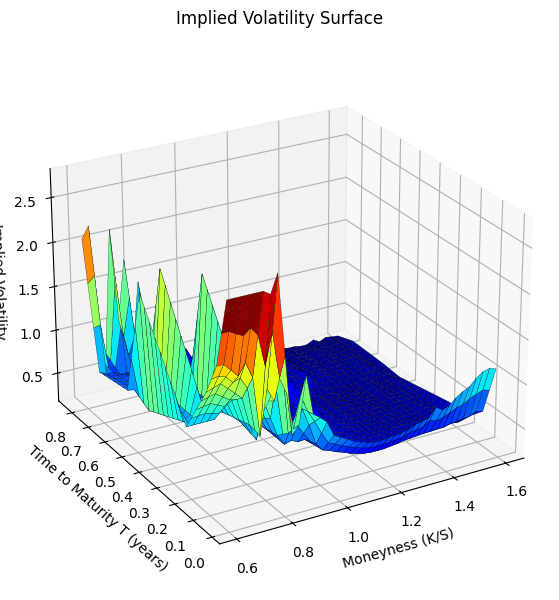

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111, projection="3d")

# surface + mesh lines
ax.plot_surface(
    M, T, Z,
    rstride=1, cstride=1,
    linewidth=0.2, antialiased=True,
    cmap="jet", edgecolor="k"
)

ax.set_title("Implied Volatility Surface", pad=20)
ax.set_xlabel("Moneyness (K/S)")
ax.set_ylabel("Time to Maturity T (years)")
ax.set_zlabel("Implied Volatility")

# similar viewing angle to the picture
ax.view_init(elev=25, azim=-120)

plt.show()

In [18]:
from mvp.data import load_options_data, most_liquid_quote_date, calls_for_date

df = load_options_data("data/raw/spy_2020_2022.csv")
date = most_liquid_quote_date(df)
calls = calls_for_date(df, date)

df.shape, date, calls.shape

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/spy_2020_2022.csv'

In [19]:
from mvp.data import load_options_data, most_liquid_quote_date, calls_for_date

df = load_options_data()  # no path needed now
date = most_liquid_quote_date(df)
calls = calls_for_date(df, date)

df.shape, date, calls.shape

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/spy_2020_2022.csv'

In [1]:
from mvp.data import load_options_data, most_liquid_quote_date, calls_for_date

df = load_options_data()

CSV PATH: /Users/rezarahimi/PycharmProjects/options-vol-surface-mvp/data/raw/spy_2020_2022.csv


In [2]:
from pathlib import Path
p = Path("/Users/rezarahimi/PycharmProjects/options-vol-surface-mvp/data/raw/spy_2020_2022.csv")
p.exists(), p.stat().st_size

(True, 1279073052)

In [1]:
from mvp.data import load_options_data, most_liquid_quote_date, calls_for_date

df = load_options_data()
date = most_liquid_quote_date(df)
calls = calls_for_date(df, date)

df.shape, date, calls.shape

((3589079, 11), '2020-03-20', (4613, 18))

In [3]:
from mvp.data import load_options_data, most_liquid_quote_date, calls_for_date
from mvp.surface import add_iv_column, build_smoothed_surface_grid

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

df = load_options_data()
date = most_liquid_quote_date(df)
calls = calls_for_date(df, date, use_last_price=False)

# compute IVs (you can cap rows for speed)
calls_iv = add_iv_column(calls, max_rows=8000)

M, T, IV = build_smoothed_surface_grid(
    calls_iv,
    expiries_top_n=8,
    m_min=0.6,
    m_max=1.6,
    n_m=45,
    n_t=30,
)

fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(M, T, IV, cmap="jet", edgecolor="k", linewidth=0.15, antialiased=True)

ax.set_title(f"Implied Volatility Surface (Smoothed) — {date}")
ax.set_xlabel("Moneyness (K/S)")
ax.set_ylabel("Time to Maturity T (years)")
ax.set_zlabel("Implied Volatility")

ax.view_init(elev=25, azim=-120)
plt.show()

KeyboardInterrupt: 

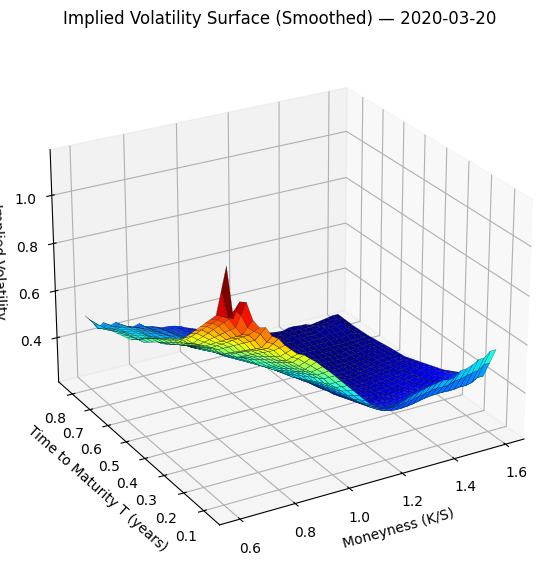

In [4]:
from mvp.data import load_options_data, most_liquid_quote_date, calls_for_date
from mvp.surface import add_iv_column, build_smoothed_surface_grid

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

df = load_options_data()
date = most_liquid_quote_date(df)

# IMPORTANT: use mid prices
calls = calls_for_date(df, date, use_last_price=False)

calls_iv = add_iv_column(calls, max_rows=12000)

M, T, IV = build_smoothed_surface_grid(
    calls_iv,
    expiries_top_n=8,
    n_m=45,
    n_t=30,
)

fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(M, T, IV, cmap="jet", edgecolor="k", linewidth=0.15, antialiased=True)
ax.set_title(f"Implied Volatility Surface (Smoothed) — {date}")
ax.set_xlabel("Moneyness (K/S)")
ax.set_ylabel("Time to Maturity T (years)")
ax.set_zlabel("Implied Volatility")
ax.view_init(elev=25, azim=-120)
plt.show()